# Apple quality dataset
- This is dataset containing various apple quality measures like sweetness, crunchiness, weight, size... .
- Based on this features concrete apple is marked as "good" or "bad"

*This analysis will focus to answer 2 questions:*
1. Which features have most influence on the label "good" or "bad" apple?
2. Base on features can we predict "good" apple and "bad" apple?


In [548]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


In [549]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [550]:
df = pd.read_csv("/kaggle/input/apple-quality/apple_quality.csv")

In [551]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [552]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [553]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [555]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [556]:
df.dropna(inplace=True)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [557]:
df.duplicated().sum()

0

In [558]:
le = LabelEncoder()
le.fit(df["Quality"])
le.classes_

array(['bad', 'good'], dtype=object)

In [559]:
df["Label"] = le.transform(df["Quality"])
df.drop('Quality', axis=1, inplace=True)
df["Acidity"] = df["Acidity"].astype(float)
df.drop('A_id', axis=1, inplace=True)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


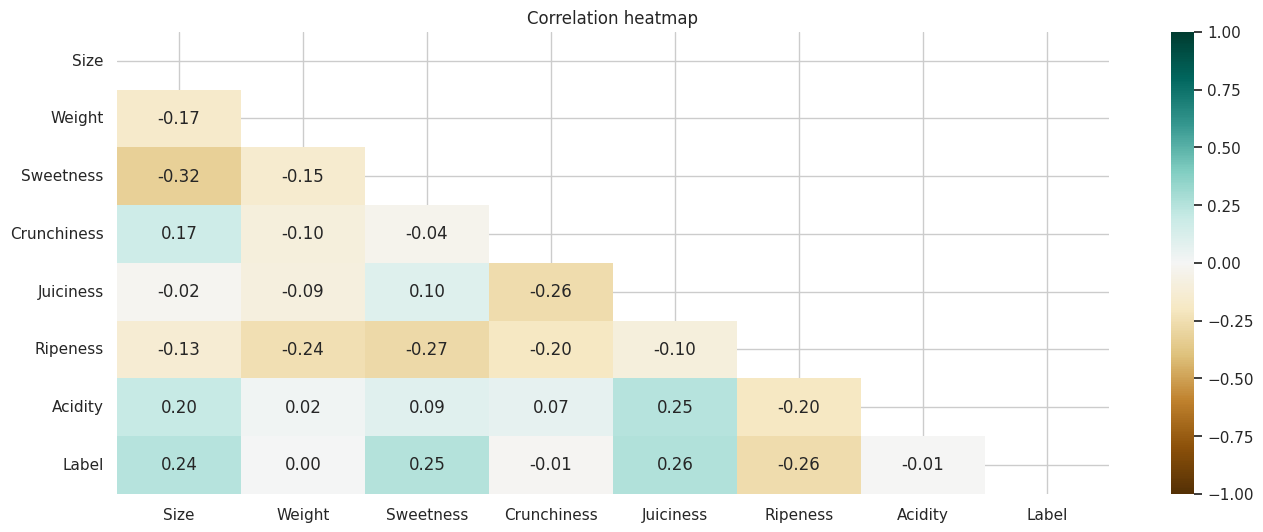

In [560]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='BrBG', mask=mask, vmax=1, vmin=-1)
heatmap.set_title("Correlation heatmap")
plt.show()

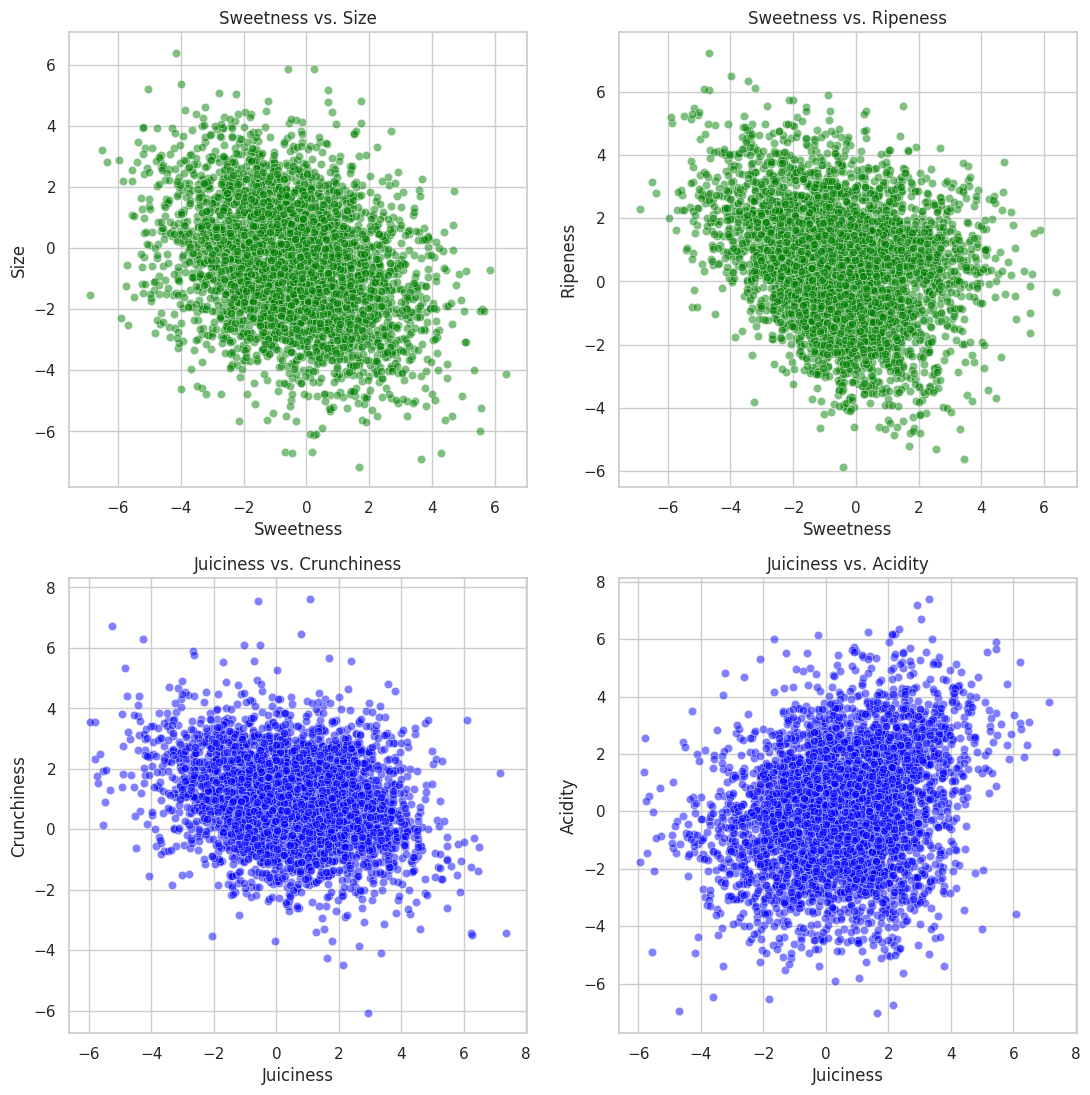

In [561]:
sns.set(style="whitegrid")

fig, axarr = plt.subplots(2, 2, figsize=(13,13))
sns.scatterplot(data=df,x='Sweetness',y='Size',alpha=0.5, ax=axarr[0][0], color="green")
sns.scatterplot(data=df,x='Sweetness',y='Ripeness',alpha=0.5, ax=axarr[0][1], color="green")
sns.scatterplot(data=df,x='Juiciness',y='Crunchiness',alpha=0.5, ax=axarr[1][0], color="blue")
sns.scatterplot(data=df,x='Juiciness',y='Acidity',alpha=0.5, ax=axarr[1][1], color="blue")
axarr[0][0].set_title('Sweetness vs. Size')
axarr[0][1].set_title('Sweetness vs. Ripeness')
axarr[1][0].set_title('Juiciness vs. Crunchiness')
axarr[1][1].set_title('Juiciness vs. Acidity')

plt.show()

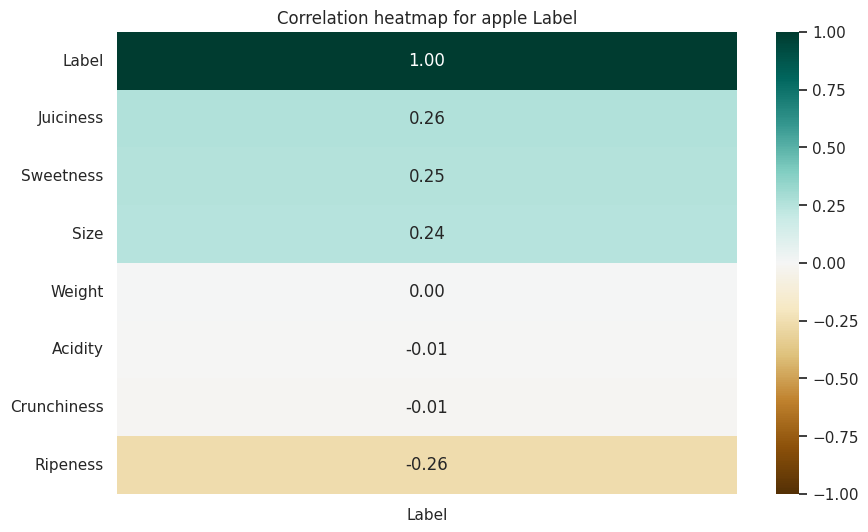

In [562]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr()[["Label"]].sort_values(by='Label', ascending=False), annot=True, fmt=".2f", cmap='BrBG', vmax=1, vmin=-1)
heatmap.set_title("Correlation heatmap for apple Label")
plt.show()

In [563]:
X = df[df.columns[:-1]]
y = df["Label"]

# Which features separate the "good" and "bad" apples best?

In [564]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [565]:
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init='auto', random_state=0)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

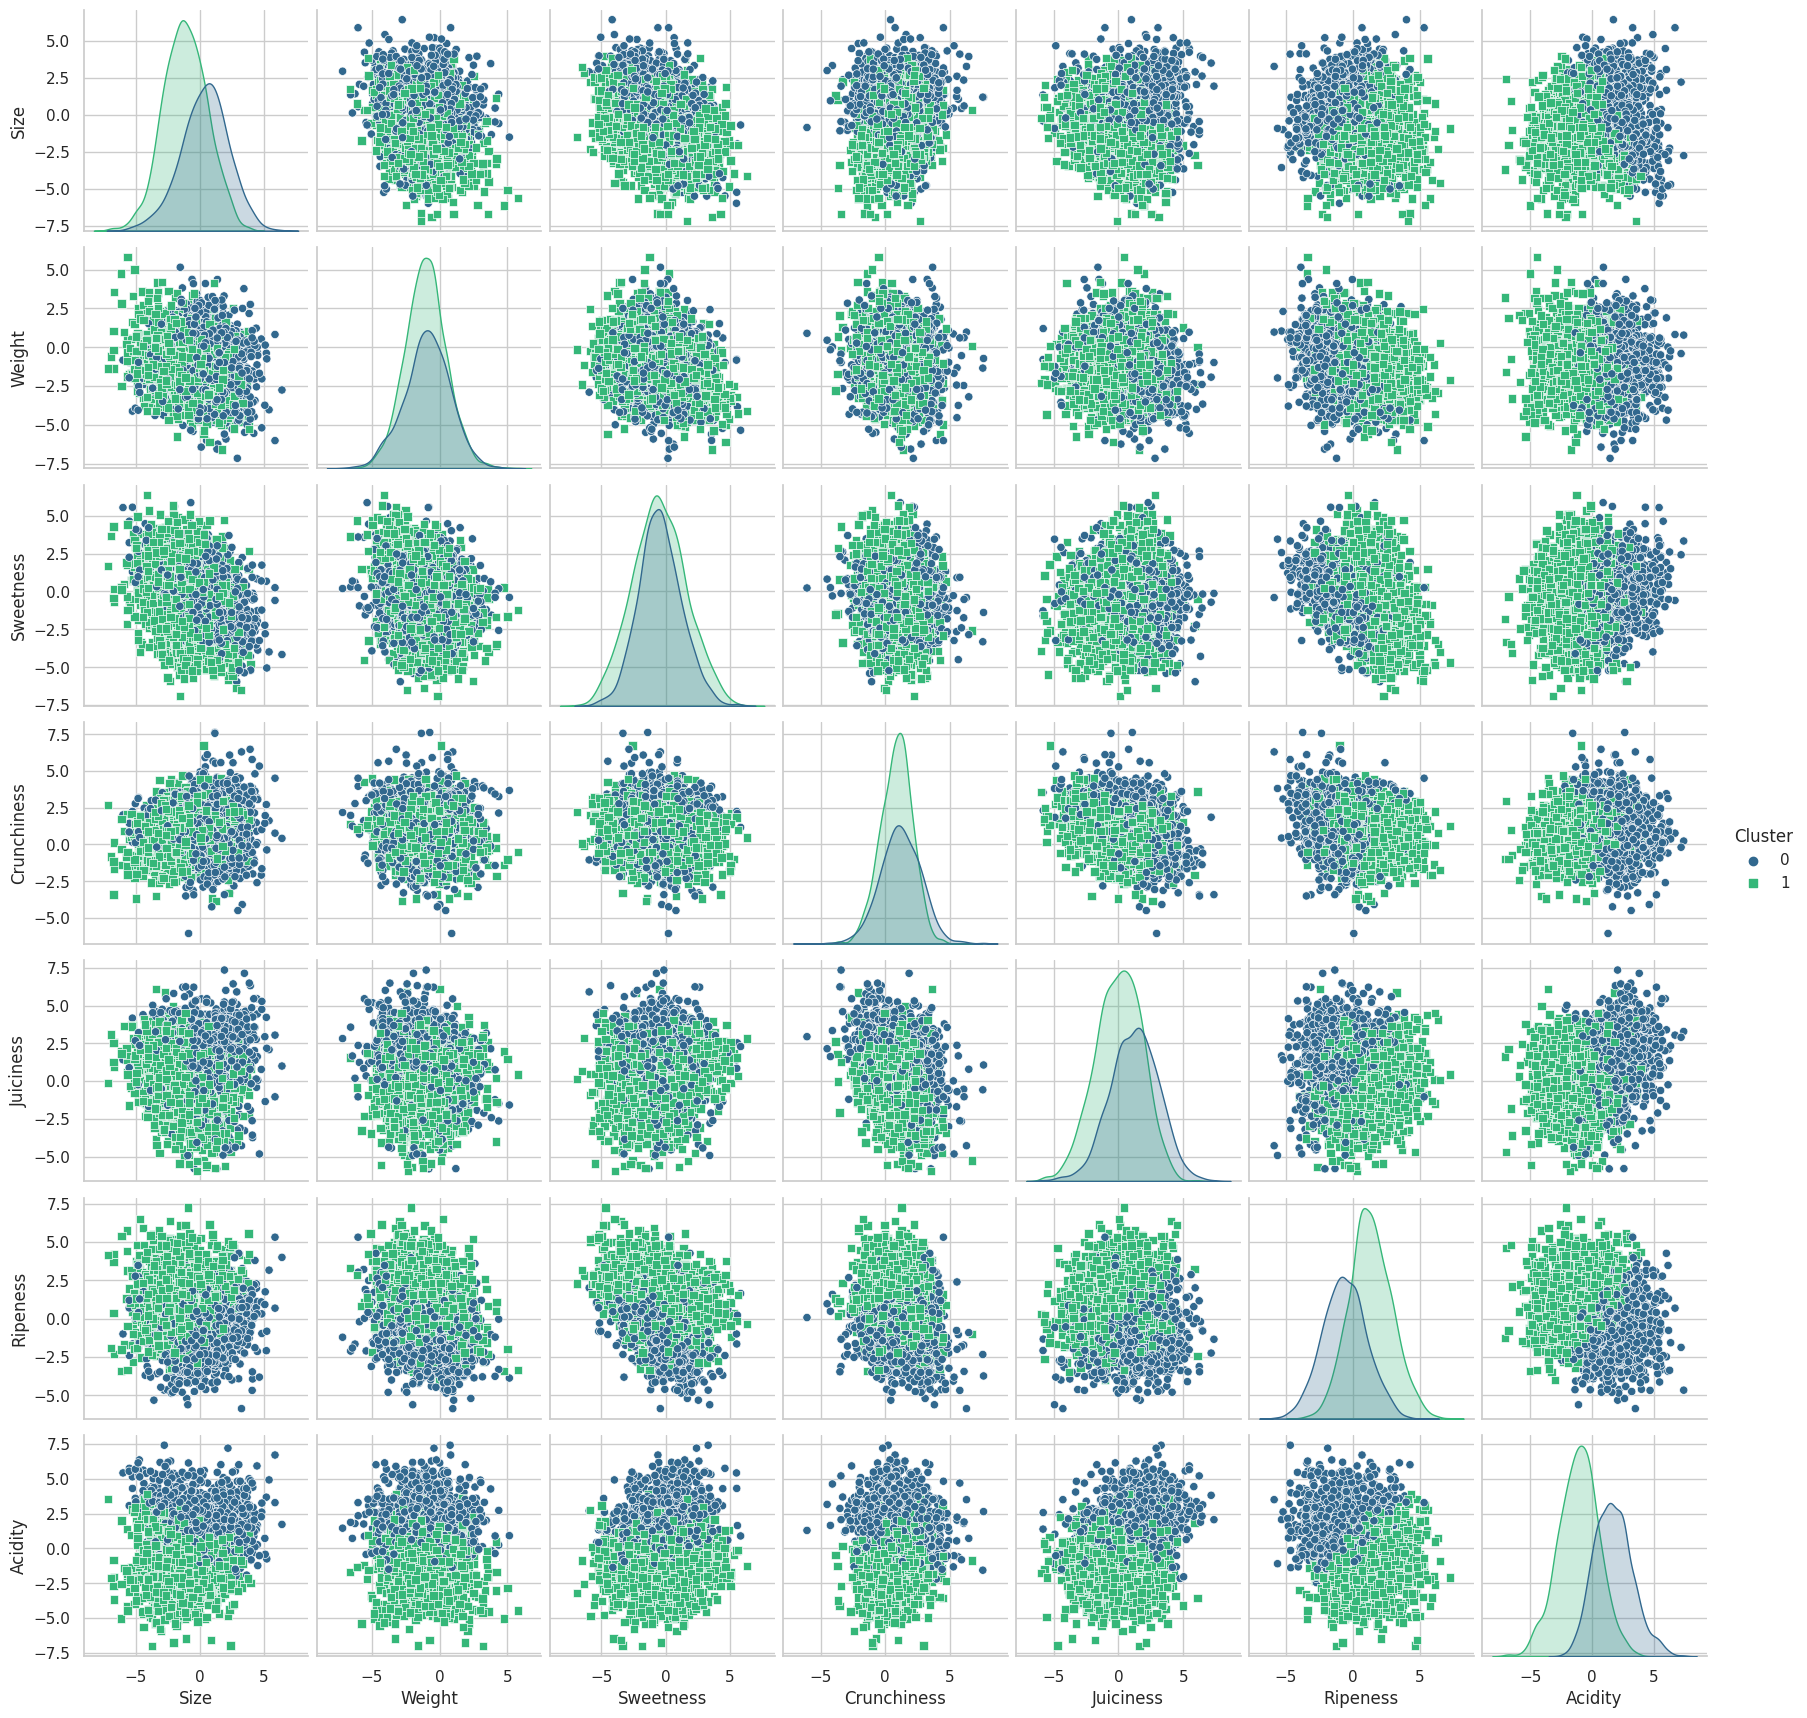

In [567]:
X_pairs = X.copy()
X_pairs["Cluster"] = kmeans.labels_
sns.pairplot(X_pairs, vars=X_pairs.columns[:-1], hue='Cluster', palette='viridis', markers=["o", "s"])

KDE plots can help identify which features have distinct distributions across different clusters. If the distributions for different clusters do not overlap significantly in a certain feature, that feature could be a strong predictor for the cluster labels ("good" apple and "bad apple").


# Model

## KNN Parameter tuning

In [568]:
k_values = [i for i in range (1,31)]
scores = []

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Accuracy Score')

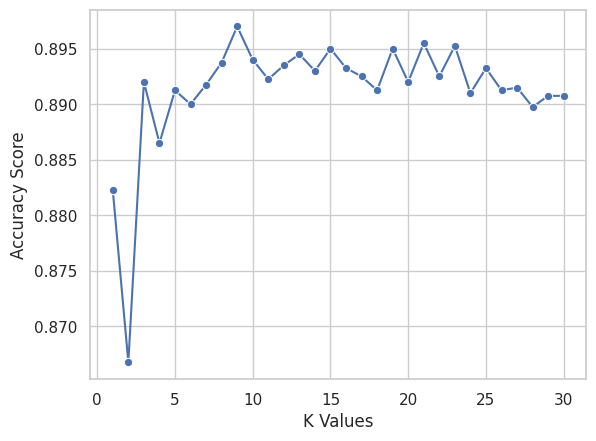

In [569]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## How accurate prediction can we get?

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [571]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

Accuracy =  90.38  %
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       650
           1       0.91      0.90      0.90       670

    accuracy                           0.90      1320
   macro avg       0.90      0.90      0.90      1320
weighted avg       0.90      0.90      0.90      1320




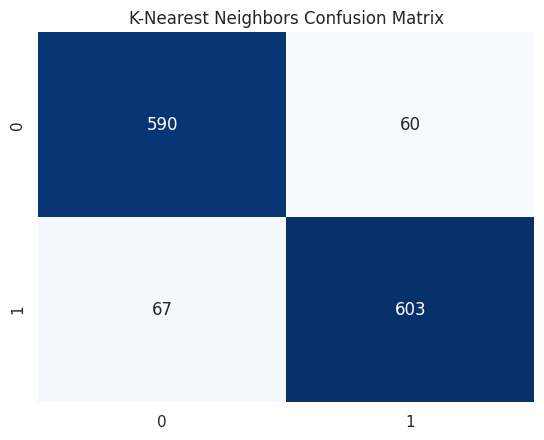

In [572]:
X_test_scaled = scaler.transform(X_test)
ypred = knn.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, ypred)

knn_test_accuracy = round(accuracy_score(y_test,ypred)*100,2)
print('Accuracy = ' , knn_test_accuracy,' %')
print("Classification report: \n{}\n".format(classification_report(y_test, ypred)))

sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('K-Nearest Neighbors Confusion Matrix');